# Spektralanalyse Driftbojendaten
Im Folgenden nutzen wir die Daten einer GPS-Boje, um mittels Spektralanalyse die Periode von Bewegungs-Oszillationen zu bestimmen. 

Hintergrund zu Feldexperiment:
[Kaleschke, L., et al., SMOS sea ice product: Operational application and validation in the Barents Sea marginal ice zone, Remote Sensing of Environment (2015), http://dx.doi.org/10.1016/j.rse.2016.03.009](http://www.seaice.de/Kaleschke_RSE_2016_final.pdf)

In [22]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import scipy.ndimage as ndimage
import scipy.signal as signal
from mpl_toolkits.basemap import Basemap, addcyclic

Populating the interactive namespace from numpy and matplotlib


In [12]:
D=pd.read_csv('CliSAP_Boje_16.csv')
Lon=array(D['Lon'])
Lat=array(D['Lat'])
D.head()

,Date(GMT),Lat,Lon
0,2014-03-15 00:00:00,74.7080,20.8926
1,2014-03-15 00:15:00,74.7050,20.8706
2,2014-03-15 00:30:00,74.7014,20.8508
3,2014-03-15 00:45:00,74.6974,20.8320
4,2014-03-15 01:00:00,74.6928,20.8152


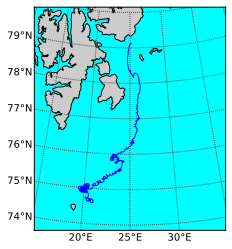

In [49]:
m = Basemap(width=600000,height=700000,resolution='i',projection='laea',lat_ts=80,lat_0=77,lon_0=25.0)
m.drawmapboundary(fill_color='aqua')
m.drawparallels(range(-90,100,1), color='#505050',labels=[1,0,0,0])
m.drawmeridians(range(-180,180,5), color='#505050',labels=[0,0,0,1])
m.drawcoastlines(linewidth=1.0, color='#000000')
m.fillcontinents()
x,y=m(Lon,Lat)
m.plot(x,y)

## Tiefpaßfilter zur Berechnung von Residuuen

Zunächst entfernen wir die langsame Drift mittels eines Glättungs-Filters


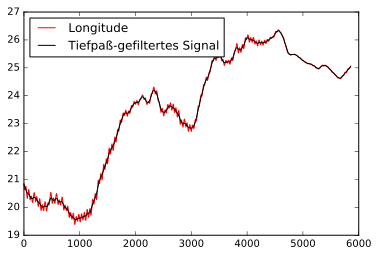

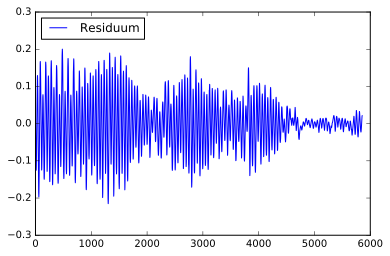

In [82]:
y=Lon

numtaps=2*24*2+1
window=signal.hamming(numtaps)
window=window/sum(window)
y_tiefpass=convolve(y, window, mode='valid') 

edge=int(numtaps/2)
y_residuum=y[edge:-edge]-y_tiefpass
y=y[edge:-edge]
figure()
plot(y,'r-',label='Longitude')
plot(y_tiefpass,'k-',label='Tiefpaß-gefiltertes Signal')
legend(loc=2)
figure()
plot(y_residuum,label='Residuum')
legend(loc=2)

## Frequenzspektrum

Periode max  12.406779661 h


(5, 100)

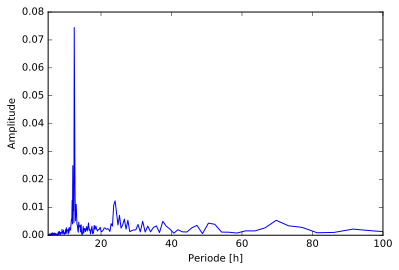

In [83]:
dt=15*60.0 
fa=1/dt # Abtastfrequenz

Y=fft.fft(y_residuum)
N = int(len(Y)/2)+1 # Halbe Länge reicht (gespiegelten Teil ignorieren)

Th=1/(linspace(0, fa/2, N)*60*60) # Umrechnen in Periode, Einheit Stunden
index_max=argmax(Y[:N])
print('Periode max ', Th[index_max],'h')
plot(Th,abs(Y[:N])/N)
xlabel('Periode [h]')
ylabel('Amplitude')
xlim([5,100])

## Gezeiten oder Trägheitsschwingung?

Gezeit M2: 12.421 h

Die Periode der Trägheitsschwingung ist abhängig von geographischer Breite $\phi$ 

$$f=2\Omega \sin(\phi)$$

$$T=\frac{2\pi}{f}$$

Literatur: Pease et al. (1995), Barents Sea tidal and inertial motions from Argos ice buoys during the Coordinated Eastern Arctic Experiment, http://onlinelibrary.wiley.com/doi/10.1029/95JC03014/abstract


In [89]:
phi=deg2rad(77.0)
w=2*pi/86164.09
f=2*w*sin(phi)
T=2*pi/f
print(T/60/60)

12.2820221543


## Frequenzauflösung

Ist die Frequenzauflösung ausreichend, um zwischen Gezeit und Trägheitsschwingung zu unterscheiden?

In [85]:
Th[index_max]

12.40677966101695

In [87]:
Th[index_max+1]

12.302521008403362